In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
# Finding the too many zeros

realdata_dir = '/home/sdybing/gnss-picker/data/realdata/summer23/'
real_data = h5py.File(realdata_dir + 'demean_realdata.hdf5', 'r')
real_data = real_data['demean_realdata'][:,:]
real_metadata = np.load(realdata_dir + 'realdata_info.npy')

OSError: Unable to open file (unable to open file: name = '/home/sdybing/gnss-picker/data/realdata/summer23/demean_realdata.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

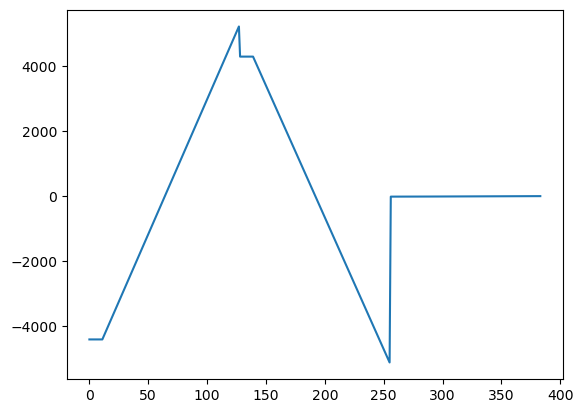

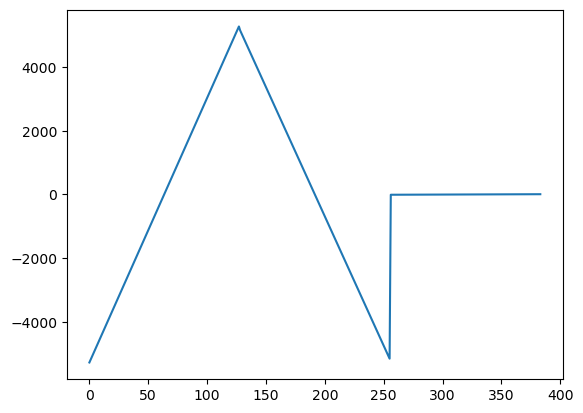

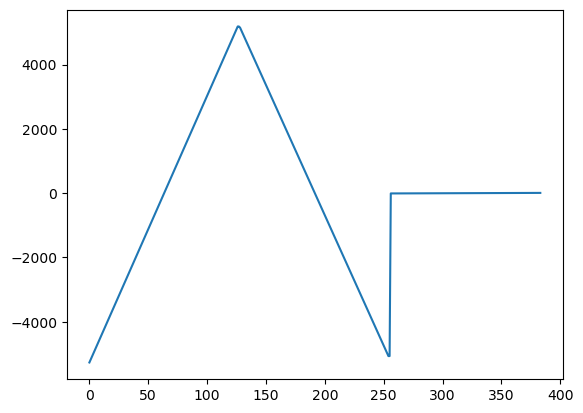

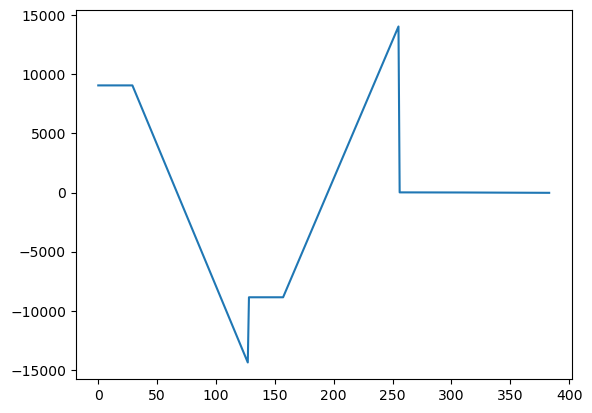

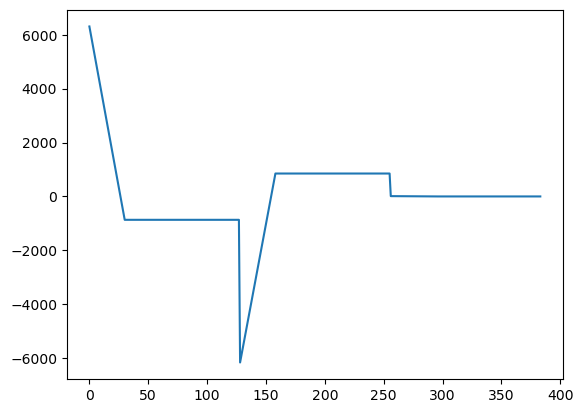

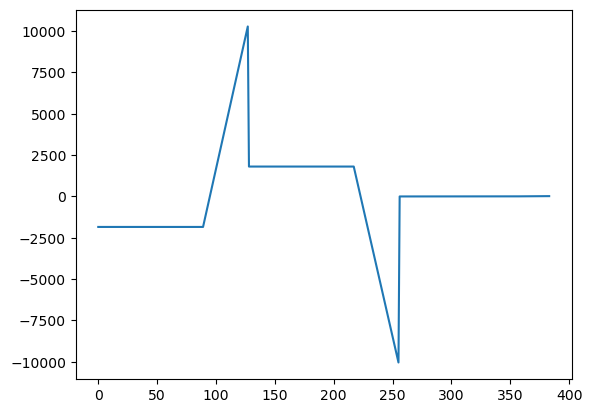

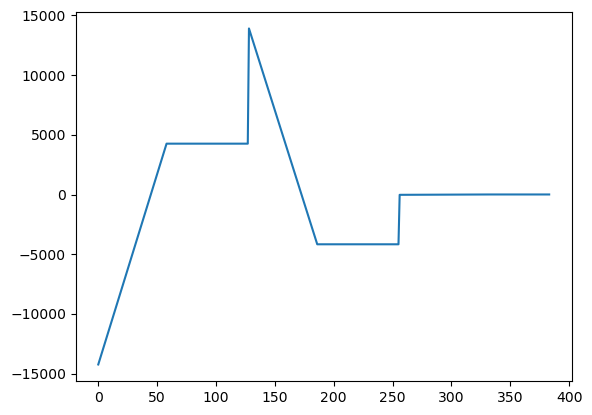

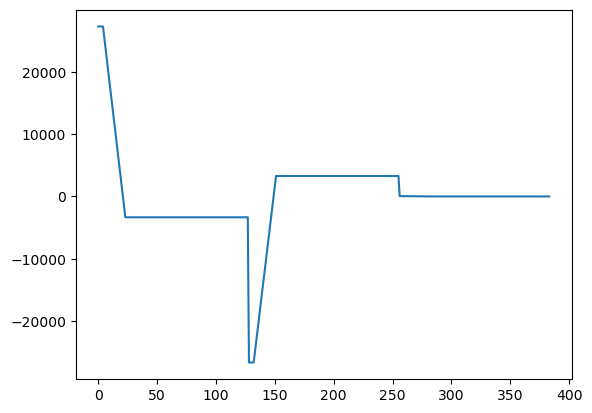

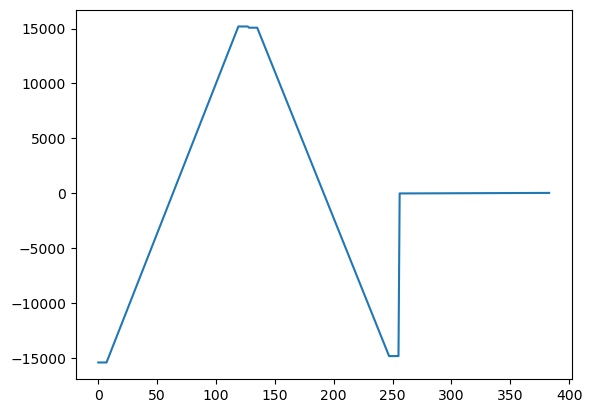

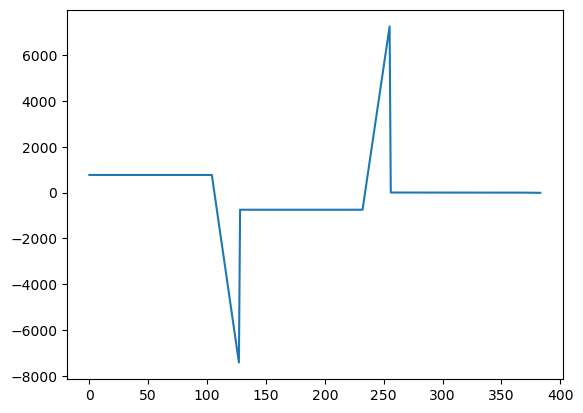

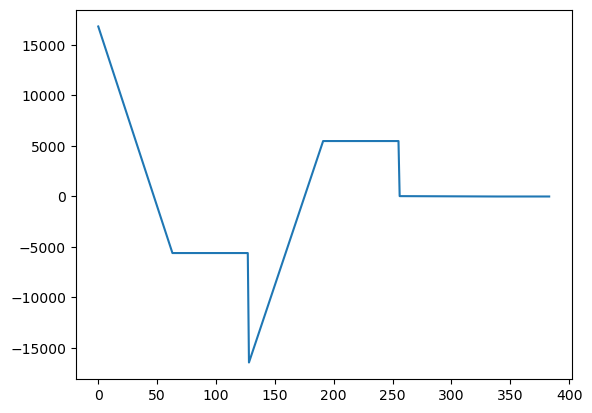

In [79]:
i = np.where(real_data > 10)[0] # Getting indices for samples with over 10 m of displacement to also remove
remove_dups_i = list(set(i))
remove_dups_i = np.sort(remove_dups_i)

glitch_indices = remove_dups_i

for i in glitch_indices:
    plt.plot(real_data[i])
    plt.show()

In [17]:
real_data.shape

(1061760, 384)

In [20]:
nlen = 128

In [32]:
diff_N = np.diff(real_data[:, :nlen])
diff_E = np.diff(real_data[:, nlen:2*nlen])
diff_Z = np.diff(real_data[:, 2*nlen:])

diff2_N = np.diff(diff_N)
diff2_E = np.diff(diff_E)
diff2_Z = np.diff(diff_Z)

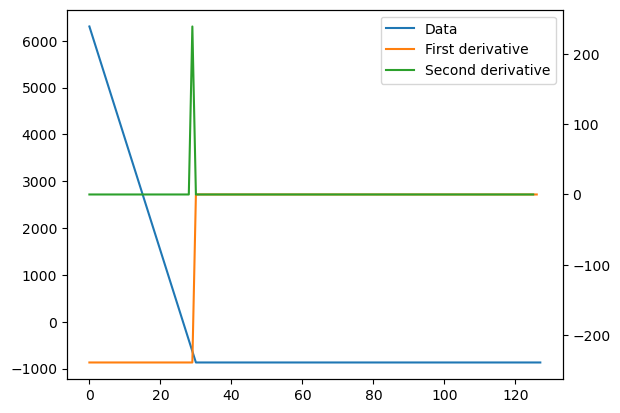

In [36]:
k = 502

fig, ax1 = plt.subplots()
ax1.plot(real_data[k, :nlen], color = 'C0', label = 'Data')
#     plt.show()
ax2 = ax1.twinx()
ax2.plot(diff_N[k], color = 'C1', label = 'First derivative')
ax2.plot(diff2_N[k], color = 'C2', label = 'Second derivative')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
plt.show();
#     plt.savefig('derivtestplot' + str(a) + '.png')
#     plt.close();

In [6]:
toomanyzeros_N = []
toomanyzeros_E = []
toomanyzeros_Z = []

for k in range(len(real_data)):
#     a += 1
#     print(a)
    b = 0
    for j in range(len(diff2_N[k])):
        point = diff2_N[k][j]
        check = np.isclose(point, 0, rtol = 1e-05)
        if check == True:
            b += 1
#     print(b)
    if b >= 60:
#         print('Too many zeros!')
        toomanyzeros_N.append(k)

print(toomanyzeros_N)

for k in range(len(real_data)):
#     a += 1
#     print(a)
    b = 0
    for j in range(len(diff2_E[k])):
        point = diff2_E[k][j]
        check = np.isclose(point, 0, rtol = 1e-05)
        if check == True:
            b += 1
#     print(b)
    if b >= 60:
#         print('Too many zeros!')
        toomanyzeros_E.append(k)

print(toomanyzeros_E)

for k in range(len(real_data)):
#     a += 1
#     print(a)
    b = 0
    for j in range(len(diff2_Z[k])):
        point = diff2_Z[k][j]
        check = np.isclose(point, 0, rtol = 1e-05)
        if check == True:
            b += 1
#     print(b)
    if b >= 60:
#         print('Too many zeros!')
        toomanyzeros_Z.append(k)
    
print(toomanyzeros_Z)

[141, 177, 178, 203, 246, 247, 248, 418, 501, 768, 870, 871, 981, 1093, 1436, 1857, 3637, 4249, 4250, 4597, 4598, 4599, 4764, 4765, 4768, 4769, 4779, 4780, 4796, 4797, 4798, 4806, 4833, 4834, 4839, 4840, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854, 4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 4863, 4864, 4865, 4866, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 4883, 4884, 4885, 4886, 4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4897, 4898, 4899, 4900, 4901, 4902, 4903, 4904, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917, 4918, 4919, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 4933, 4934, 4935, 4936, 4937, 4938, 4939, 4940, 4941, 4942, 4943, 4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4954, 4955, 4956, 4957, 4958, 4959, 4960, 4961, 4962, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4972, 4973, 4974, 4975, 4976, 4977, 4978, 4979

In [7]:
np.save(realdata_dir + 'realdata_samps_w_too_many_zeros_N.npy', np.array(toomanyzeros_N))
np.save(realdata_dir + 'realdata_samps_w_too_many_zeros_E.npy', np.array(toomanyzeros_E))
np.save(realdata_dir + 'realdata_samps_w_too_many_zeros_Z.npy', np.array(toomanyzeros_Z))

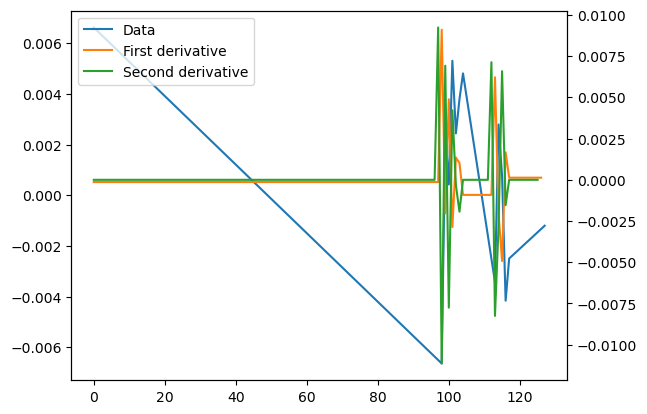

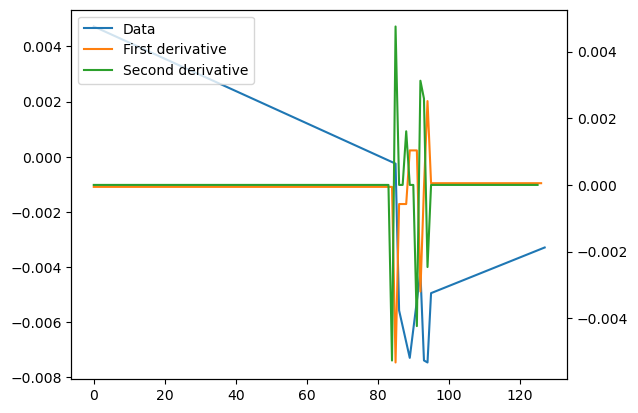

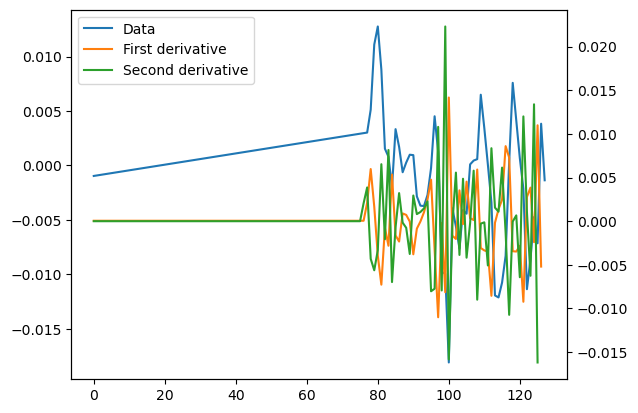

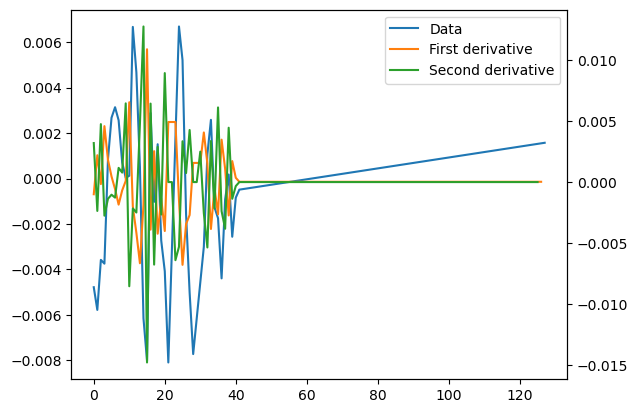

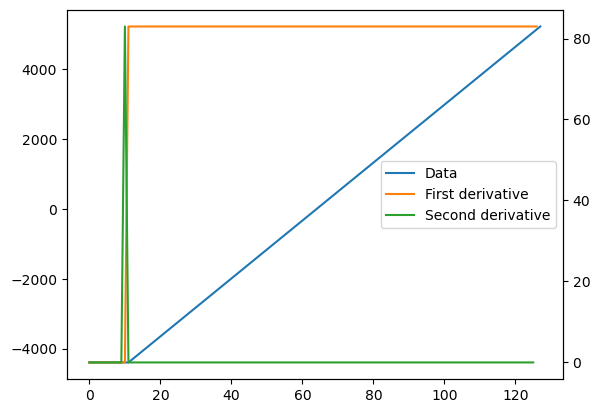

In [8]:
# Look at some examples with plots

for k in toomanyzeros_Z[:5]:
    fig, ax1 = plt.subplots()
    ax1.plot(real_data[k, :nlen], color = 'C0', label = 'Data')
#     plt.show()
    ax2 = ax1.twinx()
    ax2.plot(diff_N[k], color = 'C1', label = 'First derivative')
    ax2.plot(diff2_N[k], color = 'C2', label = 'Second derivative')
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2)
    plt.show();
#     plt.savefig('derivtestplot' + str(a) + '.png')
#     plt.close();

In [3]:
### REMOVING BAD DATA ###

bad_N = np.load(realdata_dir + 'realdata_samps_w_too_many_zeros_N.npy')
bad_E = np.load(realdata_dir + 'realdata_samps_w_too_many_zeros_E.npy')
bad_Z = np.load(realdata_dir + 'realdata_samps_w_too_many_zeros_Z.npy')

print(len(bad_N))
print(len(bad_E))
print(len(bad_Z))

#print(len(bad_N) + len(bad_E) + len(bad_Z))

67582
67582
67570


In [83]:
comb = np.concatenate((bad_N, bad_E, bad_Z, glitch_indices))
# print(len(comb))

remove_dups = list(set(comb))
remove_dups = np.sort(remove_dups)
# print(len(remove_dups))
np.save(realdata_dir + 'realdata_bad_data_rows_no_dups.npy', remove_dups)
# print(len(remove_dups))

In [95]:
real_data_rembad = np.delete(real_data, remove_dups, axis = 0)
print(real_data.shape)
print(real_data_rembad.shape)

real_metadata_rembad = np.delete(real_metadata, remove_dups, axis = 0)
print(real_metadata.shape)
print(real_metadata_rembad.shape)

(1061760, 384)
(994155, 384)
(1061760, 5)
(994155, 5)


In [98]:
h5f = h5py.File(realdata_dir + 'demean_realdata_rembad.hdf5', 'w') 
h5f.create_dataset('demean_realdata_rembad', data = real_data_rembad)
h5f.close()

np.save(realdata_dir + 'real_metadata_rembad.npy', real_metadata_rembad)